An early step in any effort to analyze or model data should be to understand how to the variables are distributed. Techniques for distribution visualization can provide quick answers to many import quqestions. What range do the observations cover? What is their central tendency? Are they heavily skewered in one direction? Is ther eevidence for bimodality? Are these significant outliers? Do the answers to thse questions vary across subsets defined by other variables?

The distributions module contails several functiosn designed to answer questions as these. The axes-level functiosn histplot(), kdeplot(), ecdfplot(), and ruplot(). They are grouped together within the figure-level displot(), jointplot(), and pairplot() functions.

There are several different approaches to visualizing a distritbution, and each has it relative advantages and drawbacks. It is important to understand these factors so that you can choose the best approach for your particular aim.

Plotting univariate Histograms
Perhaps the most common approach to visualizing a distirbution is the histogram. this is the default approach in
displot(), which uses the same underlying code as histplot(). A histogrram is a bar plot
where the axis representing the data variable is divided into a set of discrete bins and the
count of observations falling within each bin is shown using the height of the corresponding
bar:
    

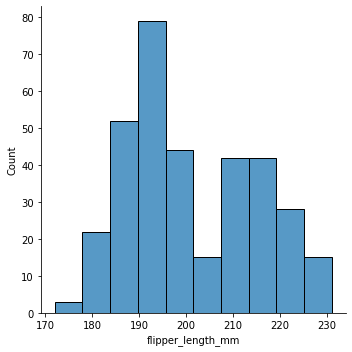

In [2]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

This plot immediately affords a few insights about the flipper_length_mm variable. For instance, we can see that
the most common flipper length is about 195 mm, but the distributionn appears bimodal,
so this one number does not represent the data well.

In [ ]:
Choosing the bin size
The size of the bins is an immportant parameter, and using the wrong bin size can mislead by obscuring important
features of the data or by creating apparent features out of random variability. By default, displot() /histplot()
choose a default bin size based on the variance of the data and the number of observations. But you should not be
over-reliant on such automatic approaches, because they depend on particular assumptions about the structure of your data.
it is alwasy advisable to check that your impressions of the distribution are consistent
accross different binn sizes. To choose the size directly, set the binwidth parameter:
    


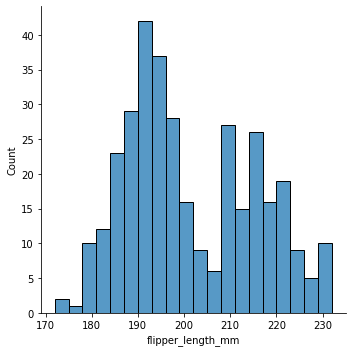

In [3]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

#in other circumstances, it may make more sense to specify the number of bins, rather than their size:


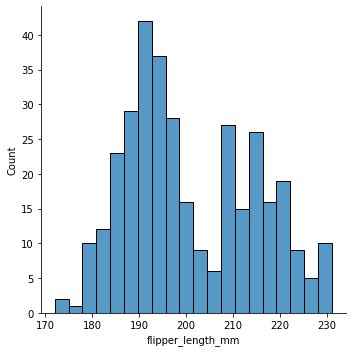

In [5]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

One example of a situation where defaults fail is when the variable takes a relatively small number of integer values. In that case, the default bin width may be too small, creating awkward gaps in the distribution:

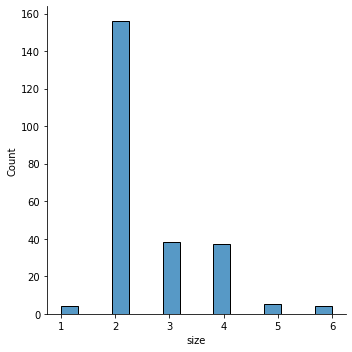

In [6]:
tips= sns.load_dataset("tips")
sns.displot(tips, x="size")

One approach would be to specify the precise bin breaks by passing an array to bins:

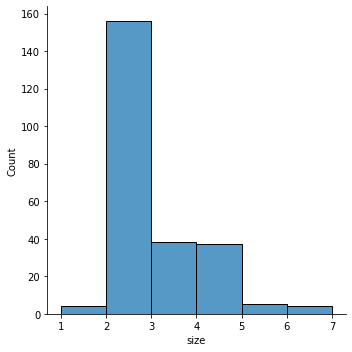

In [7]:
sns.displot(tips, x="size", bins=[1,2,3,4,5,6,7])

This can also be accomplished by setting discrete= True, which chooses bin breaks that represent
the unique vaalues in a dataset with bars that are centered on their corresponding value.

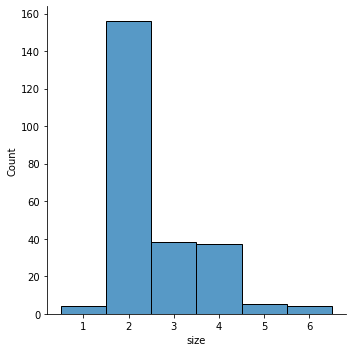

In [8]:
sns.displot(tips, x="size", discrete=True)

It's also possible to visualize the distribution of a categorical variable using the logic of a histogram. Descrete bins are automatically set for categorical variables, but it may also be helpful to "shrink" the bars slightly to emphasize the categorical nature of the axis.

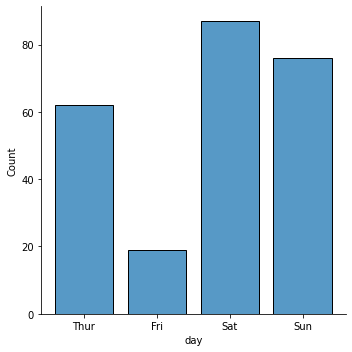

In [9]:
sns.displot(tips, x="day", shrink=.8)

Conditionin on other variables
Once you understand the distribution of a variable, the next step is often to ask
whether features of that distribution differ across other variables in the dataset.
For example, what accounts for the bimodal distribution of flipper lengths that we saw
above? displot() and histplot () provide support for conditional subsetting via
the hue semantic. Assigning a variable to hue will draw a separate histogram for
each of its unique values and distinguish them by color:
    


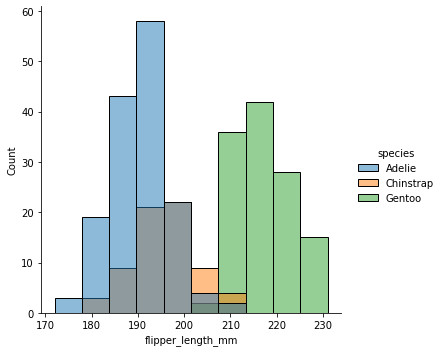

In [10]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

By default, the different histograms are "layered" on top of each other and, in
some cases, they may be difficult to distinguish. One option to change the visual
representation of the histogram from a bar plot to a "step" plot:


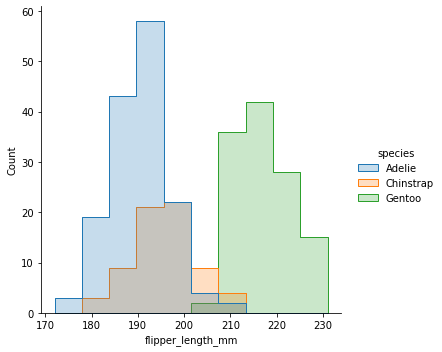

In [12]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

Alternatively, instead of layering each bar, they can be "stacked", or moved vertically. In this plot,
the outline of the full histogram will match the plot with only a single variable:
    

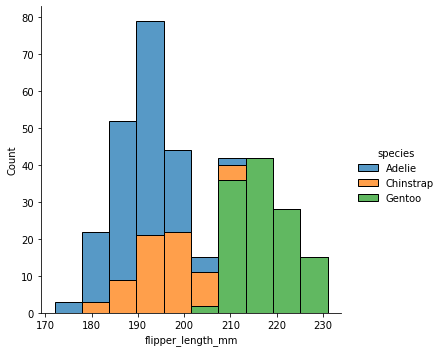

In [14]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

The stacked histogram emphasizes the part-whole relationship between the variables,but it can obscure
other features(for example, it is difficult to determine the mode of the Adelie distribution. Another option is "dodge" the bars, which moves them horizontally and reduces their width. This ensures that there are no overlaps and that the bars remain comparable in terms of height. But it only works well when the categorical variable has a small number of levels:

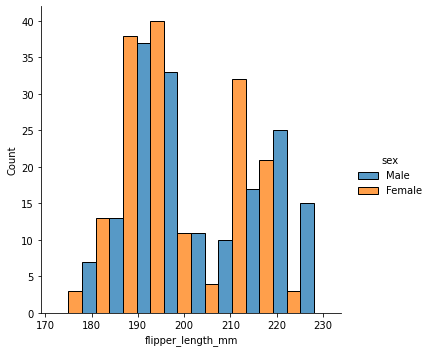

In [15]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

Because displot() is a figure-level function and is drawn onto a FacetGrid, it is also possible to draw each individual distribution in a separate subplot by assigning the second variable to col or row rather than (or in addition to) hue.
This reperesents the distribution of each subset well, but it makes more difficult to draw direct comparisons:

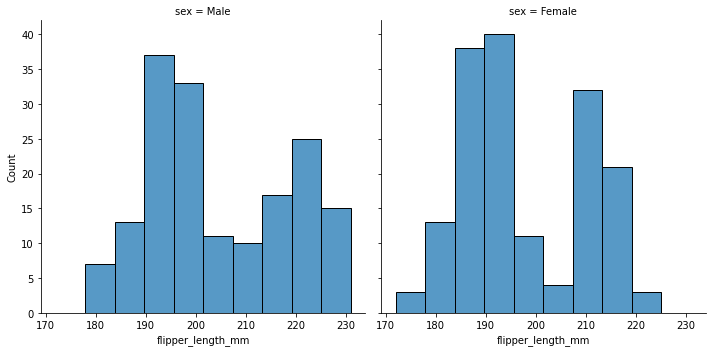

In [18]:
sns.displot(penguins, x="flipper_length_mm", col="sex", multiple="dodge")

None of these approaches are perfect, and we will soon see some alternatives to a histogram that better-suitied to the task of comparison.

Normalized Histogram Statistics

Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to normalize the counts using the stat parameter:

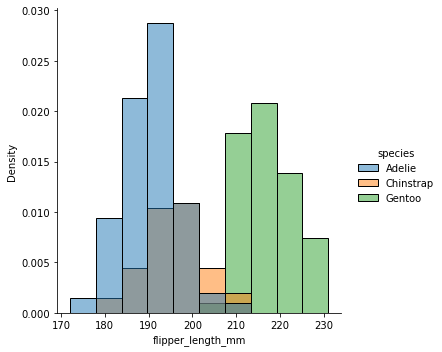

In [19]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

By default, however, thenormalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting common_norm=False, each subset will be normalized indepedently.

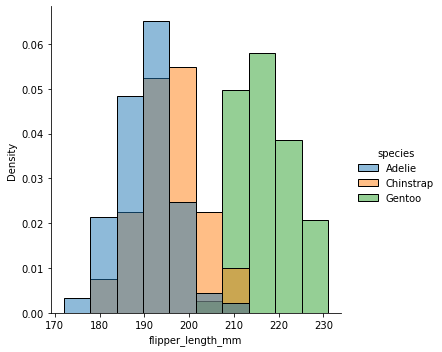

In [20]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

Density normalization scales the bars so that their areas sum to 1. As a result, the density axis is not directly interpretable. Another option is normalize the bars to that their heights sum to 1. This makes most sense when the variable is discrete, but it is an option for all histograms:

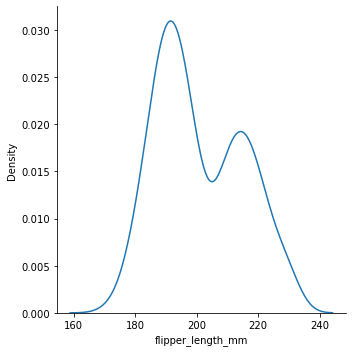

In [22]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

Choosing the smoothing bandwidth
Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoother estimate might erase meaninful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to checkk the robustness of the estimate is to adjust the default bandwidth:

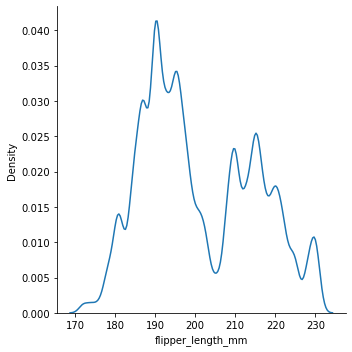

In [23]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

Note how the narrow bandwidth makes the bimodality much more apparent, but the curve is much less smooth. In contrast, a larger bandwidth obscures thebiomadlity almost completely:

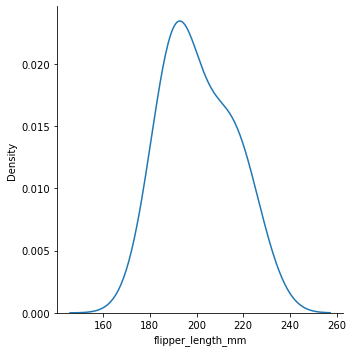

In [24]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

Conditioning on other variables.
As with histograms, if you assign a hue variable, a separate density estimate will computed for each level of that variable:

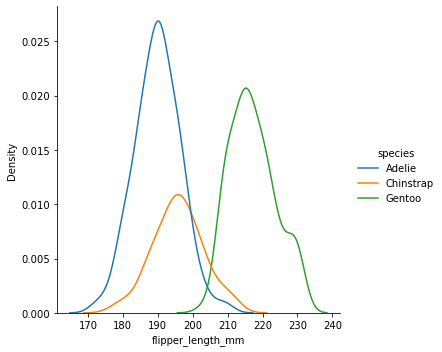

In [26]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

In many cases, the layered KDE is easier to interpret than the layered histogram, so it is often a good choice for the task of comparison. Many of the same options for resolving multiple distribtutions apply to the KDE as well, however:

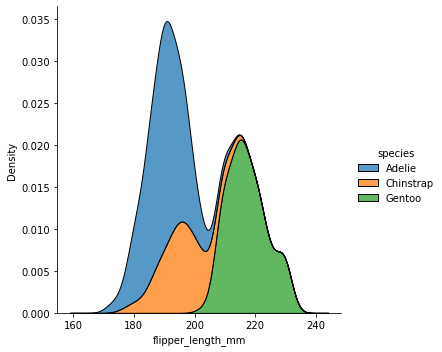

In [27]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

Note how the stacked plot filled in the area between each curve by default. It is also possible to fill in the curves for single or layered densities, although the default alpha value(opacity) will be different, so that the individual densities are easier to resolve.

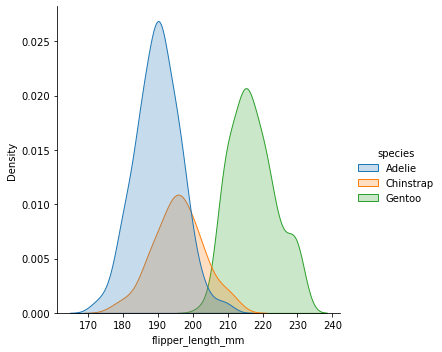

In [28]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

Kernel density estimation pitfalls
KDE plots have any advantages. Important features of the data are easy to discern(central tendency, bimodality, skew), and they afford easy comparisons between subsets. But there are also situation where KDE poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded. One way this assumption can fail is when a variable reflects a quantity that is naturally bounded. If there are observations lyinng close to the bound(for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:



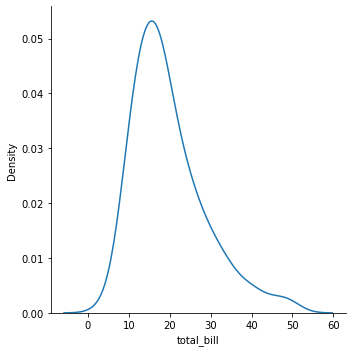

Kernel density estimation pitfalls
KDE plots have many advantages. Immportant features of the data are easy to discern(central tendency, bimodality, skew)
and they afford easy comparisons between subsets. But there are also situations where KDE poorly
represents the underlying data. This is beccause the logic of KDE assumes that the underlying
distribution is smooth and unbounded. One way this assumption can fail is when a variable reflects a quantity that is naturally bounded.
If there are observations lying close the bound(for example, small values of a variable that cannot be negative), the KDE
curve may extend to unrealistic values:

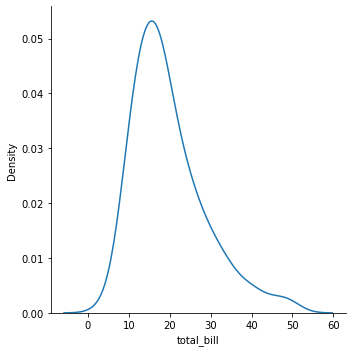

In [31]:
sns.displot(tips, x="total_bill", kind="kde")

This can be partially avoided with the cut parameter, which specifies how far the curve should extend tbeyond the extreme datapoints. But this influences only where the curve is drawn; the density estimate will still smooth over the range where no data can exist, causing it to be artificially low low at the extrememes of the distribution:

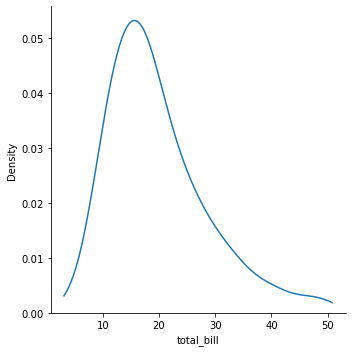

In [34]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

The KDE approach also fails for discrete data or when data are naturally continunous but specific
values are over-represented. The important thing to keep in mind is that the KDE will
always how you a smooth curve, even when the data themselves are not smooth. For example, consider this distribution
of diamond weights

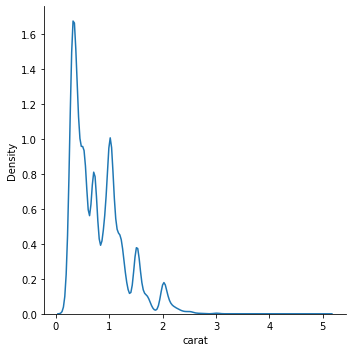

In [35]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

While the KDE suggests that there are peaks around specific values, the histogram reveals
a much more jagged distribution:

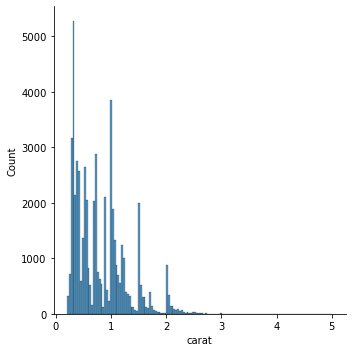

In [37]:
sns.displot(diamonds, x="carat")


In [ ]:
As a compromise, It is possible to combine these two approaches. While in histogram mode,
displot() (as with histplot()) has the option of including the smoothed KDE curve

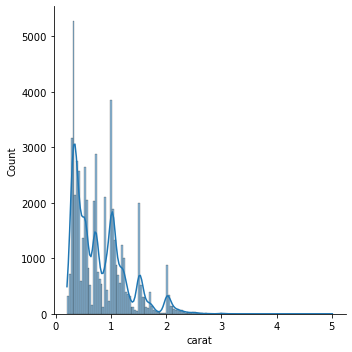

In [38]:
sns.displot(diamonds, x="carat", kde=True)

Empirical cumulative distributions
A third option for visualizing distributions computes the "empirical cumulative distribution function" (ECDF). This plot draw a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a samll value:

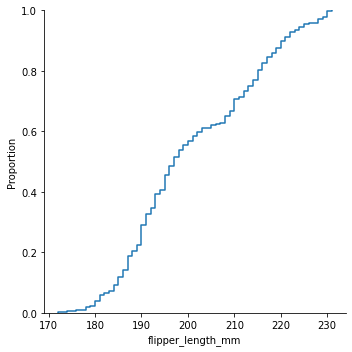

In [39]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")



The ECDF plot has two key advantages. Unlike the histogram or KDE, it directly represents each datapoint. That means there is no bin size or smoothing parameter to consider. Additionally, because the curve is monotonically increasing, it is well-suited for comparaing multiple distributions:

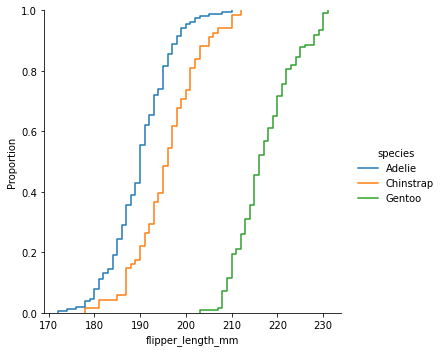

In [40]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

Visualizing bivariate distributions
All of the examples so far have considered univariate distributions: distributions of a single variable, perhaps conditional on a second variable 
assigned to hue. Assigning a second variable to y, however, will plot a bivariate distribution:



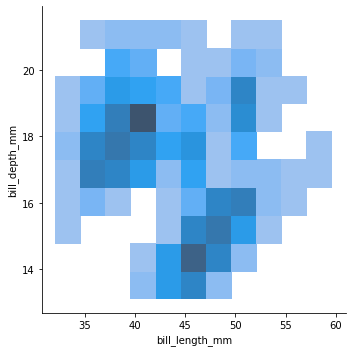

In [43]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observatiosn
within each rectangle with the fill color( analagous to a heatmap()). Similarily, a 
bivariate KDE plot smoothe sthe (x,y) observations with a 2D gaussian. The default
representation then shows the contours of the 2d density:

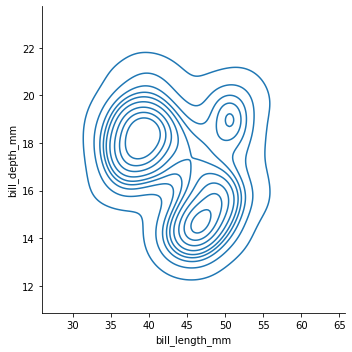

In [46]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

Assigning a hue variable will plot multiple heatmaps or contour sets using different colors.
For bivariate histograms, this will only work well if there is minimal overlap between the
conditional distributions:

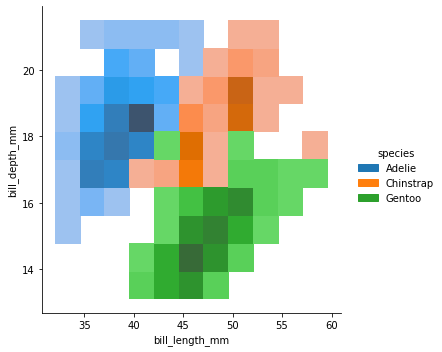

In [45]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

The contour approach of the bivariate KDE plot lends itself better to evaluating overlap, although a plot with too may contours can get busy:

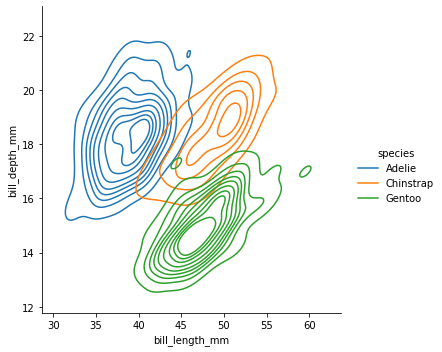

In [48]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

Just as with univaraite plots, the choice of bin size or smoothing bandwidth will determine how
well the plot represents the underlying bivariate distribution. The same parameters applyh, but
they can be tuned for each variable by pasasing a pair of values:

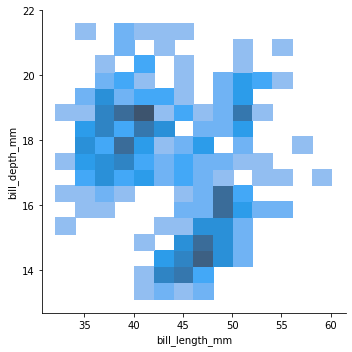

In [50]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))


To aid interpretation of the heatmap, add a colorbar to show the mapping between counts
and color intensity:

To aid interpretation of the heatmap, add a colorbar to show the mapping between 
courst and color intensity:

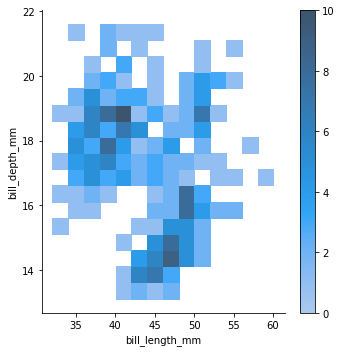

In [52]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)


The meaning of the bivariate density contours is a lless straightforward. Because the density is not directly interpretable, the contours are draw at iso-proportions of the density, meaning that each curve shows a level such that some proportion of p of the density lies below it. The p values are evenly spaced, with the lowest level controlled by the thresh parameter and the number controlled by levels:

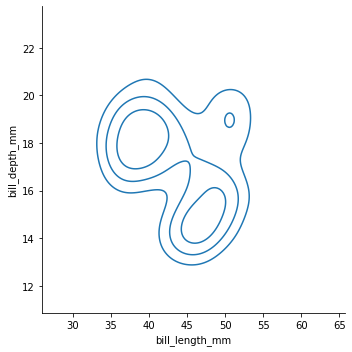

In [53]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

The bivariate histogram allows one or both variables to be discrete. Plotting one discrete and one continous variable offers another way to compare conditional univariate distributions:

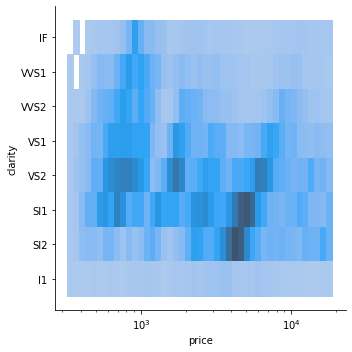

In [54]:
sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))


In contrast, plotting two discrete variables inn an easy to show the cross-tabulation
of the observations:

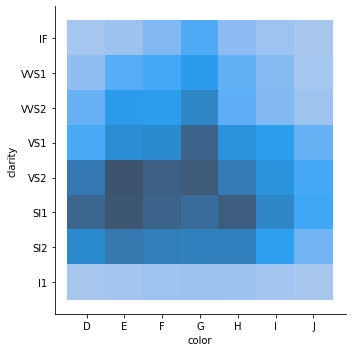

In [56]:
sns.displot(diamonds, x="color", y="clarity")

Distribution visualization in other settings
Several other figure-level plotting functinos in seaborn make use of the histplot() and kdeplot() functions.

Plotting joint and marginal distributions
The first is jointplot(0, which augments a bivariate relational or distribution plot with the marginal ldistributions of the two variables. By default< jointplot() represents the bivariate distribution using scatterplot() and the marginnal distributions of the two variables. By default, jointplot() represents the bivariate distribution using scatterplot() and the marginal distributions using histplot():
                       
                       
    

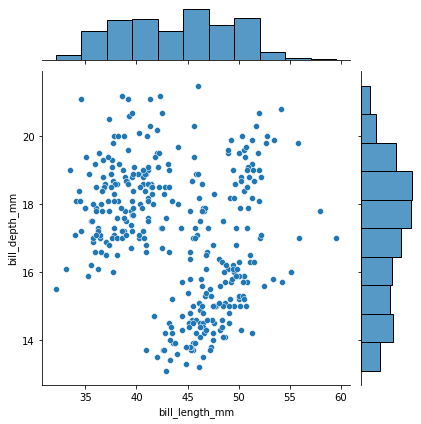

In [59]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

Similiar to displot:(), setting a different kind="kde" inn jointplot() will change both the joint and marginal plots the use kdeplot()

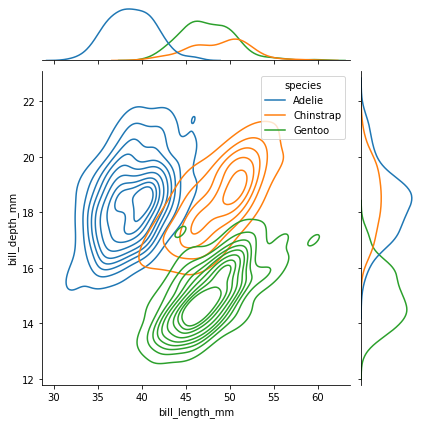

In [61]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
    
)

jointplot() is a convenient interface to the JointGrid class, which offeres more flexibility when used directly:

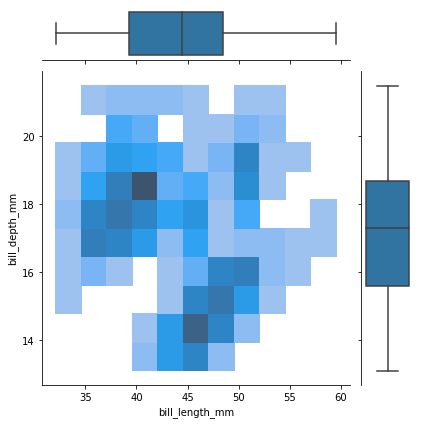

In [62]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

A less-obtrusive way to show marginal distributions uses a "rug" plot, which adds a small tickk on the edge of the plot torepresent each individual observation. This isbuilt into displot():
    

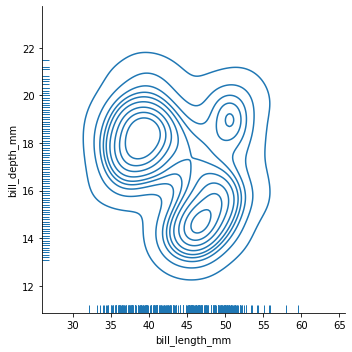

In [64]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug="True"
)

And the axes-level rugplot() funcction can be sued to add rugs on the side of any other kind of plot:

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

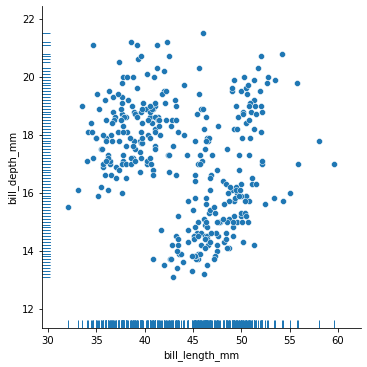

In [66]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

Plotting many distributions 
The pairplot() function offers a similar blend of joint and marginal distributiions.
Rather than focusing on a single relationship, however, pairplot() uses a "small-multiple"
approach to visualize the univariate distribution of all variables in a dataset
along with all of their pairwise relationships:

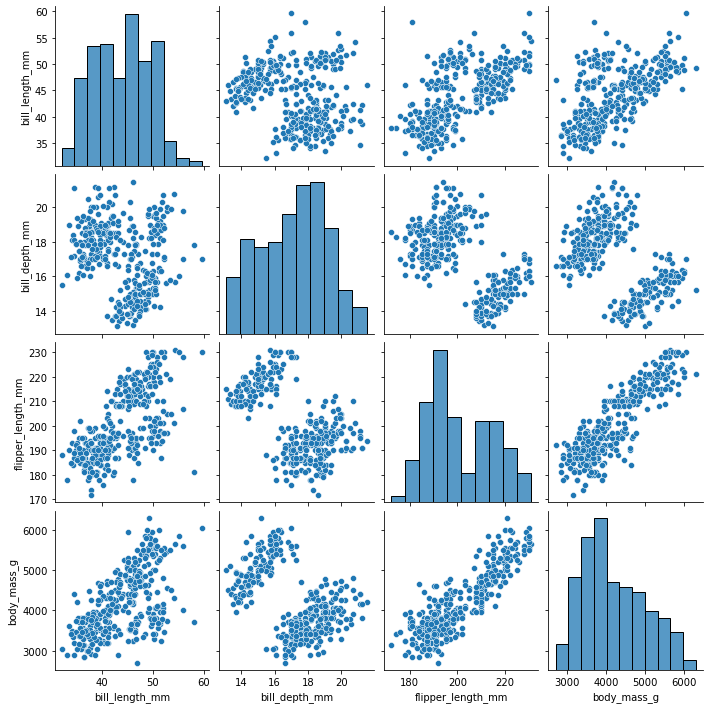

In [67]:
sns.pairplot(penguins)

As with jointplot()/ Jointgrid, using the underlying PairGrid directly will afford more flexibility with only a bit more 

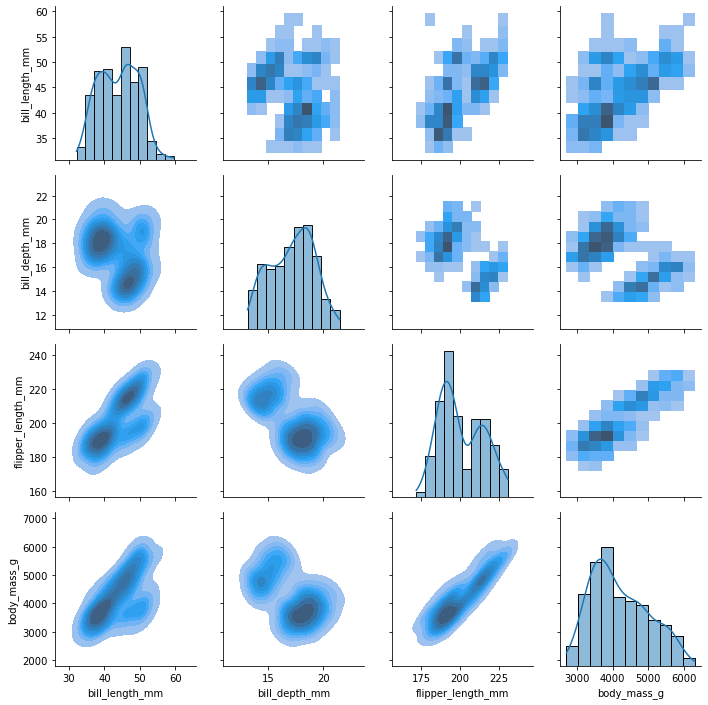

In [69]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)